# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [2]:
# student details 1: Elad H. 3542 
# student details 2: Shirin F. 4815
# student details 3: Ofir N. 9038

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: ChatGPT
Goal: Understand how to use StratifiedKFold with GridSearchCV
Propmpt1: How can i create a pipe to pass models and scaling configurations to GridSearchCV to work with StratifiedKFold

Other assistanse:  Github copilot for variable names  
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

הבעיה המרכזית בפרויקט זה היא סיווג (קטלוג) של דגימות יין לשלושה סוגים שונים, בהתבסס על מדידות כימיות שנאספו מכל דגימה. מטרת הלמידה היא לפתח מודל שמסוגל לקבל ערכים של 13 תכונות מספריות (כמו אחוז אלכוהול, חומצה מאלית, מגנזיום ועוד) ולנבא לאיזה סוג יין שייכת כל דגימה. הנתונים נאספו ממדידות מעבדה של יינות,כאשר כל דגימה מסומנת בסוג היין שלה.
<pre>




    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [3]:
import pandas as pd 
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns 


train_df = pd.read_csv('data/wine_train.csv')
test_df = pd.read_csv('data/wine_test.csv')

print("Training Data Sample:")
display(train_df.head(5))

print("Testing Data Sample:")
display(test_df.head(5))



Training Data Sample:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


Testing Data Sample:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


In [4]:
print("\nSummary statistics")
display(train_df.describe())



Summary statistics


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


<span style="font-size:85%">
בודקים וסטטיסטיקות כדי לוודא שהנתונים שלמים, להבין את המבנה שלהם ולזהות ערכים חריגים. זה עוזר להחליט אם צריך ניקוי או טיפול נוסף לפני המשך העבודה.רוב התכונות מתפלגות בטווחים סבירים, אך יש תכונות עם סטיית תקן גבוהה (למשל proline) שמצביעה על שונות גדולה בין הדגימות. לא נראים ערכים חריגים קיצוניים במיוחד.
</span>


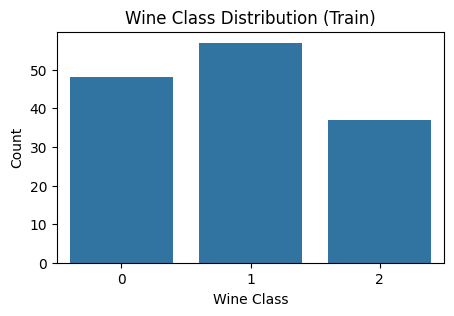

In [5]:
plt.figure(figsize=(5,3))
sns.countplot(x='target', data=train_df)
plt.title('Wine Class Distribution (Train)')
plt.xlabel('Wine Class')
plt.ylabel('Count')
plt.show()

<span style="font-size:85%" dir="rtl">
גרף ההתפלגות של המטרה (countplot) מציג את כמות הדגימות בכל קטגוריה. כך אפשר לראות אם יש איזון בין הקבוצות או אם אחת מהן דומיננטית, מה שיכול להשפיע על ביצועי המודל.ההתפלגות בין סוגי היין יחסית מאוזנת, כך שאין קבוצה דומיננטית במיוחד. זה טוב כי מודל הלמידה לא ייטה לטובת קבוצה מסוימת.
</span>


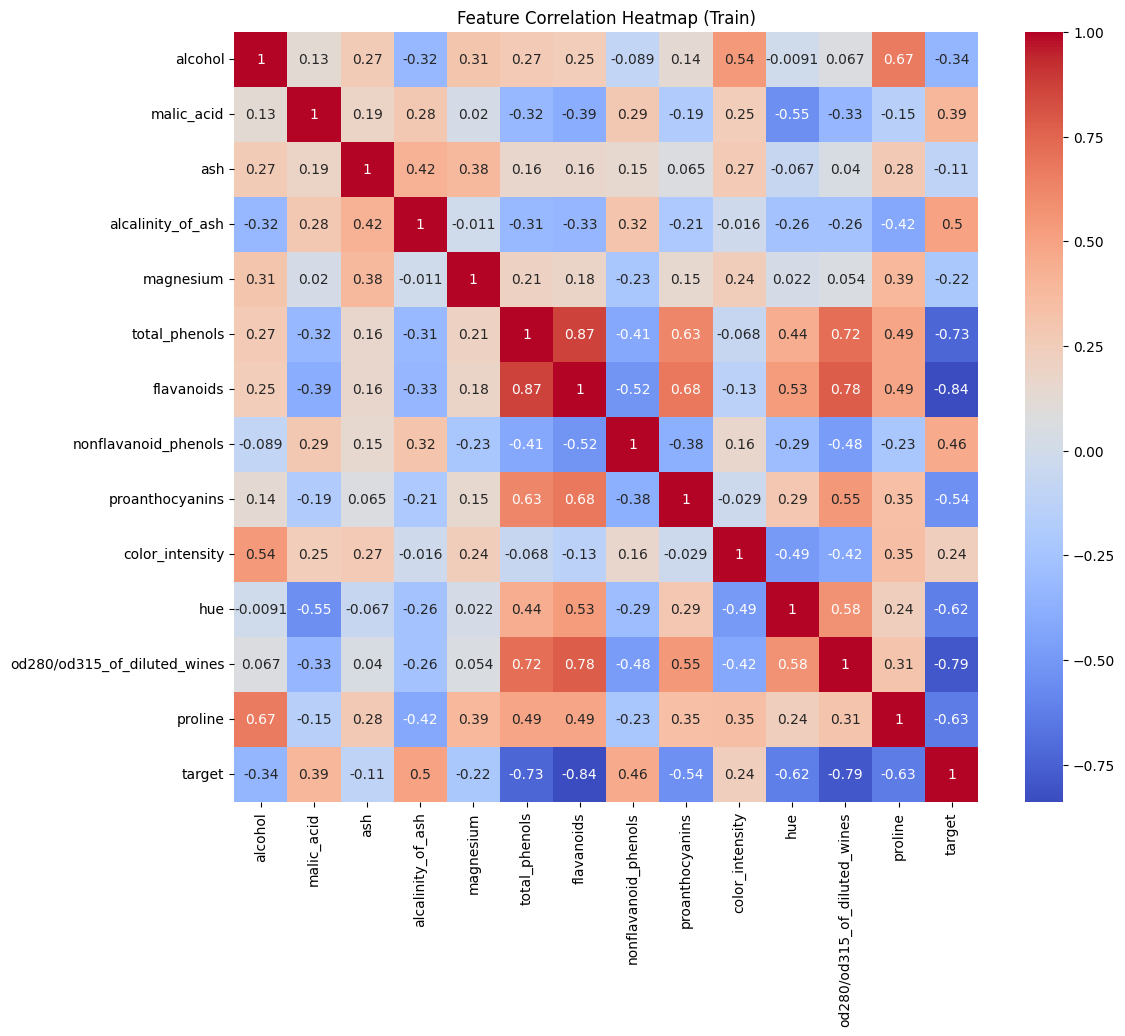

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap (Train)')
plt.show()

<span style="font-size:85%" dir="rtl">
מפת הקורלציה (heatmap) עוזרת לזהות קשרים חזקים בין תכונות שונות. זה חשוב כדי להבין אילו תכונות עשויות להיות מיותרות או חשובות במיוחד לסיווג.יש תכונות שמקושרות חזק זו לזו (למשל flavanoids ו-total_phenols), מה שיכול להצביע על תלויות לא רלוונטיות. כדאי לשקול זאת בבחירת תכונות למודל.
</span>

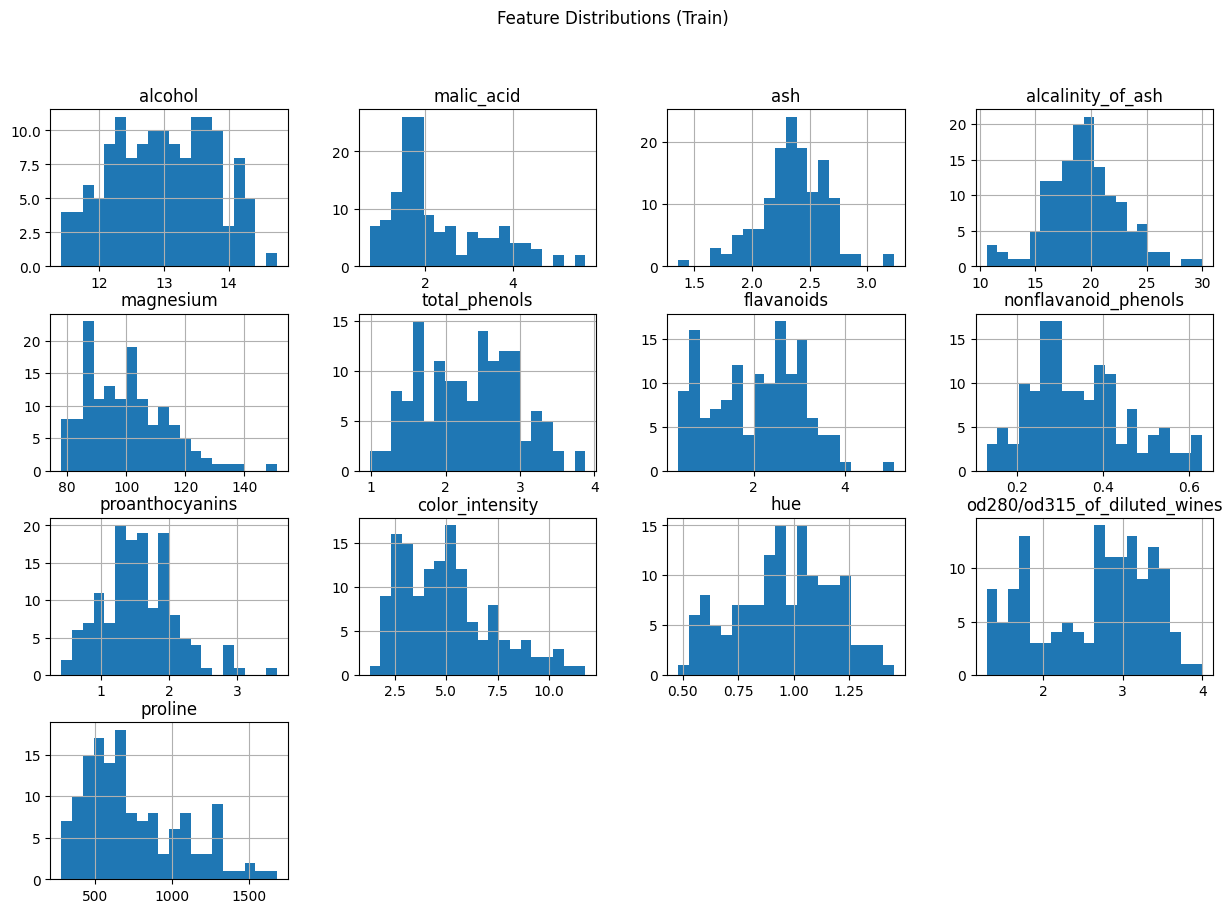

In [7]:
feature_cols = [col for col in train_df.columns if col != 'target']
train_df[feature_cols].hist(figsize=(15,10), bins=20)
plt.suptitle('Feature Distributions (Train)')
plt.show()

<span style="font-size:85%" dir="rtl">
היסטוגרמות של התכונות מציגות את ההתפלגות של כל משתנה. כך אפשר לזהות ערכים חריגים, להבין את טווחי הערכים ולבחור שיטות קידוד או סקלינג מתאימות. רוב התכונות מתפלגות בצורה נורמלית או אחידה, אך יש כמה תכונות עם התפלגות לא סימטרית וערכים חריגים (למשל flavanoids). זה עשוי להשפיע על הצורך בסקלינג או טיפול בערכים חריגים בהמשך.

</span>

## Part 3 - Experiments
You could add as many code cells as needed

In [8]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import f1_score, classification_report, confusion_matrix, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
import pandas as pd
import numpy as np

In [9]:
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']
X_test = test_df.drop('target', axis=1)
y_test = test_df['target']

In [10]:
# --- Define feature engineering configurations ---
feature_engineering_configs = [
    # No scaling, no selection
    ('none', None, None),
    # Standardization only
    ('standard', StandardScaler(), None),
    # MinMax scaling only
    ('minmax', MinMaxScaler(), None),
    # Standardization + feature selection (top 8 features)
    ('standard_select', StandardScaler(), SelectKBest(f_classif, k=8)),
    # MinMax scaling + feature selection (top 8 features)
    ('minmax_select', MinMaxScaler(), SelectKBest(f_classif, k=8)),
]

models = {
    'LogisticRegression': LogisticRegression(multi_class='multinomial', random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

param_grids = {
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'max_iter': [100, 200, 300]
    },
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'metric': ['euclidean', 'manhattan']
    }
}

macro_f1 = make_scorer(f1_score, average='macro')

results = []

In [11]:
for fe_name, scaler, selector in feature_engineering_configs:
    # Feature engineering on train
    X_fe = X_train.copy()
    if scaler:
        X_fe = scaler.fit_transform(X_fe)
    if selector:
        X_fe = selector.fit_transform(X_fe, y_train)
    # Feature engineering on test
    X_test_fe = X_test.copy()
    if scaler:
        X_test_fe = scaler.transform(X_test_fe)
    if selector:
        X_test_fe = selector.transform(X_test_fe)
    for model_name, model in models.items():
        grid = GridSearchCV(
            estimator=model,
            param_grid=param_grids[model_name],
            scoring=macro_f1,
            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
            n_jobs=-1
        )
        grid.fit(X_fe, y_train)
        # Best cross-validation score and parameters
        best_score = grid.best_score_
        best_params = grid.best_params_
        # Evaluate on test set
        y_pred_test = grid.best_estimator_.predict(X_test_fe)
        test_macro_f1 = f1_score(y_test, y_pred_test, average='macro')
        # Save results
        results.append({
            'feature_engineering': fe_name,
            'model': model_name,
            'best_params': best_params,
            'cv_macro_f1': best_score,
            'test_macro_f1': test_macro_f1
        })
        # Print summary for each experiment
        print(f"Feature Engineering: {fe_name}, Model: {model_name}")
        print("Best Params:", best_params)
        print("CV Macro F1:", best_score)
        print("Test Macro F1:", test_macro_f1)
        print("Classification Report (Test):")
        print(classification_report(y_test, y_pred_test))
        print("Confusion Matrix (Test):")
        print(confusion_matrix(y_test, y_pred_test))
        print("-" * 60)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Feature Engineering: none, Model: LogisticRegression
Best Params: {'C': 10, 'max_iter': 300}
CV Macro F1: 0.9415436924442174
Test Macro F1: 0.9193121693121693
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       0.92      0.86      0.89        14
           2       1.00      0.91      0.95        11

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36

Confusion Matrix (Test):
[[11  0  0]
 [ 2 12  0]
 [ 0  1 10]]
------------------------------------------------------------
Feature Engineering: none, Model: RandomForest
Best Params: {'max_depth': None, 'n_estimators': 50}
CV Macro F1: 0.9730625583566759
Test Macro F1: 0.9731615673644658
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
  

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Feature Engineering: standard, Model: LogisticRegression
Best Params: {'C': 0.1, 'max_iter': 100}
CV Macro F1: 0.9794876791296229
Test Macro F1: 1.0
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Confusion Matrix (Test):
[[11  0  0]
 [ 0 14  0]
 [ 0  0 11]]
------------------------------------------------------------
Feature Engineering: standard, Model: RandomForest
Best Params: {'max_depth': None, 'n_estimators': 100}
CV Macro F1: 0.9792116266796574
Test Macro F1: 1.0
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.0

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Feature Engineering: minmax, Model: LogisticRegression
Best Params: {'C': 1, 'max_iter': 100}
CV Macro F1: 0.986830674298705
Test Macro F1: 1.0
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Confusion Matrix (Test):
[[11  0  0]
 [ 0 14  0]
 [ 0  0 11]]
------------------------------------------------------------
Feature Engineering: minmax, Model: RandomForest
Best Params: {'max_depth': None, 'n_estimators': 100}
CV Macro F1: 0.9792116266796574
Test Macro F1: 1.0
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Feature Engineering: standard_select, Model: LogisticRegression
Best Params: {'C': 1, 'max_iter': 100}
CV Macro F1: 0.9794876791296229
Test Macro F1: 0.9731615673644658
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        11

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

Confusion Matrix (Test):
[[11  0  0]
 [ 0 13  1]
 [ 0  0 11]]
------------------------------------------------------------
Feature Engineering: standard_select, Model: RandomForest
Best Params: {'max_depth': None, 'n_estimators': 200}
CV Macro F1: 0.9670653188811758
Test Macro F1: 0.9731615673644658
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00 

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Feature Engineering: minmax_select, Model: LogisticRegression
Best Params: {'C': 1, 'max_iter': 100}
CV Macro F1: 0.9657647907647908
Test Macro F1: 1.0
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Confusion Matrix (Test):
[[11  0  0]
 [ 0 14  0]
 [ 0  0 11]]
------------------------------------------------------------
Feature Engineering: minmax_select, Model: RandomForest
Best Params: {'max_depth': None, 'n_estimators': 200}
CV Macro F1: 0.9670653188811758
Test Macro F1: 1.0
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1  

In [12]:
results_df = pd.DataFrame(results)
print("All experiment results (sorted by CV Macro F1):")
display(results_df.sort_values(by='cv_macro_f1', ascending=False))


All experiment results (sorted by CV Macro F1):


,feature_engineering,model,best_params,cv_macro_f1,test_macro_f1
6,minmax,LogisticRegression,"{'C': 1, 'max_iter': 100}",0.986831,1.000000
3,standard,LogisticRegression,"{'C': 0.1, 'max_iter': 100}",0.979488,1.000000
9,standard_select,LogisticRegression,"{'C': 1, 'max_iter': 100}",0.979488,0.973162
7,minmax,RandomForest,"{'max_depth': None, 'n_estimators': 100}",0.979212,1.000000
4,standard,RandomForest,"{'max_depth': None, 'n_estimators': 100}",0.979212,1.000000
1,none,RandomForest,"{'max_depth': None, 'n_estimators': 50}",0.973063,0.973162
10,standard_select,RandomForest,"{'max_depth': None, 'n_estimators': 200}",0.967065,0.973162
13,minmax_select,RandomForest,"{'max_depth': None, 'n_estimators': 200}",0.967065,1.000000
12,minmax_select,LogisticRegression,"{'C': 1, 'max_iter': 100}",0.965765,1.000000
5,standard,KNN,"{'metric': 'manhattan', 'n_neighbors': 7}",0.958820,0.973162


In [13]:
# Find the best configuration by cross-validation macro F1 score
best_row = results_df.sort_values(by='cv_macro_f1', ascending=False).iloc[0]

print("Best feature engineering:", best_row['feature_engineering'])
print("Best model:", best_row['model'])
print("Best hyperparameters:", best_row['best_params'])
print("Best CV Macro F1:", best_row['cv_macro_f1'])
print("Test Macro F1:", best_row['test_macro_f1'])

Best feature engineering: minmax
Best model: LogisticRegression
Best hyperparameters: {'C': 1, 'max_iter': 100}
Best CV Macro F1: 0.986830674298705
Test Macro F1: 1.0


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [14]:
fe_name = best_row['feature_engineering']
model_name = best_row['model']
best_params = best_row['best_params']


In [15]:
scaler = None
selector = None
for cfg in feature_engineering_configs:
    if cfg[0] == fe_name:
        scaler = cfg[1]
        selector = cfg[2]
        break


In [16]:
X_train_fe = X_train.copy()
if scaler:
    X_train_fe = scaler.fit_transform(X_train_fe)
if selector:
    X_train_fe = selector.fit_transform(X_train_fe, y_train)

In [17]:
if model_name == 'LogisticRegression':
    model = LogisticRegression(**best_params, multi_class='multinomial', random_state=42)
elif model_name == 'RandomForest':
    model = RandomForestClassifier(**best_params, random_state=42)
elif model_name == 'KNN':
    model = KNeighborsClassifier(**best_params)

In [18]:
model.fit(X_train_fe, y_train)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'multinomial'


## Part 5 - Apply on test and show model performance estimation

In [20]:
# Apply the same feature engineering to the test set
X_test_fe = X_test.copy()
if scaler:
    X_test_fe = scaler.transform(X_test_fe)
if selector:
    X_test_fe = selector.transform(X_test_fe)

y_pred_test = model.predict(X_test_fe)

print("First 5 test predictions:", y_pred_test[:5])


test_macro_f1 = f1_score(y_test, y_pred_test, average='macro')
print("Test Macro F1:", test_macro_f1)
print("Classification Report (Test):")
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_test))

First 5 test predictions: [2 0 2 1 2]
Test Macro F1: 1.0
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Confusion Matrix (Test):
[[11  0  0]
 [ 0 14  0]
 [ 0  0 11]]
